In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0939 - accuracy: 0.2835 - val_loss: 1.7731 - val_accuracy: 0.3696
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7171 - accuracy: 0.3844 - val_loss: 1.6614 - val_accuracy: 0.4131
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6483 - accuracy: 0.4107 - val_loss: 1.6500 - val_accuracy: 0.4091
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6049 - accuracy: 0.4237 - val_loss: 1.5997 - val_accuracy: 0.4220
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5780 - accuracy: 0.4368 - val_loss: 1.6073 - val_accuracy: 0.4270
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5485 - accuracy: 0.4416 - val_loss: 1.5611 - val_accuracy: 0.4497
Epoch 7/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5366 - accuracy: 0.4527 - val_loss: 1.5688 - val_ac

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 1s 4ms/step - loss: 1.4827 - accuracy: 0.4718
正解率= 0.4717999994754791 loss= 1.4827229976654053


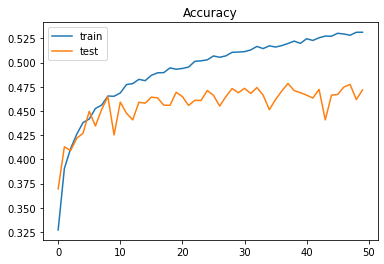

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

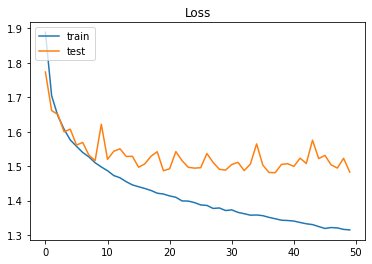

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.save_weights('clfar10-weight_mlp.h5')